## Latent Dirichlet Allocation (LDA) Algorithm Explained

LDA is a probabilistic generative model used for topic modeling in natural language processing. It is designed to uncover hidden topics within a collection of documents and understand how words are distributed across those topics. Below is a step-by-step breakdown of the LDA algorithm:

### 1. Initialization
- Decide on the number of topics (a hyperparameter, often denoted as \(K\)) you want to discover in your document collection.

### 2. Data Preparation
- Gather a collection of text documents to analyze.
- Tokenize the documents: Split them into words or tokens, optionally removing common stop words and punctuation.
- Create a vocabulary: Compile a list of unique words found across all documents.

### 3. Model Initialization
- Initialize three matrices:
  - \(N_{d, k}\): The number of times document \(d\) has been assigned to topic \(k\).
  - \(N_{k, w}\): The number of times word \(w\) has been assigned to topic \(k\).
  - \(N_{d, k, \text{total}}\): The total number of assignments of documents to topic \(k\).

### 4. Random Assignment of Topics
- For each word in each document, randomly assign a topic from the set of \(K\) topics. This step initializes topic assignments randomly.

### 5. Iterative Process
- The core of LDA is an iterative process to refine topic assignments and uncover meaningful topics.

### 6. Iteration Steps
- For each word in each document:
  1. Calculate two probabilities for the current topic assignment:
     - \(P(\text{topic \(k\)} | \text{document \(d\)}, \text{excluding the current word})\): The probability of topic \(k\) being assigned to document \(d\), considering all other topic assignments in the document.
     - \(P(\text{word \(w\)} | \text{topic \(k\)}, \text{excluding the current word})\): The probability of word \(w\) being assigned to topic \(k\), considering all other occurrences of word \(w\) in the corpus assigned to topic \(k\).
  2. Use these probabilities to sample a new topic assignment for the current word, aiming to align with both the document and the word.
  3. Update counts in the matrices based on the new topic assignment:
     - Increment \(N_{d, k}\) for the document-topic pair.
     - Increment \(N_{k, w}\) for the topic-word pair.
     - Increment \(N_{d, k, \text{total}}\) for the document-topic pair across all words in the document.

### 7. Repeat Iterations
- Repeat the iteration steps for a fixed number of iterations or until convergence, typically when topic assignments stabilize.

### 8. Output
- After convergence, obtain:
  - For each document, the probability distribution over topics.
  - For each topic, the probability distribution over words.
  - The most likely topics for each document and the most likely words for each topic.

### 9. Post-processing
- Analyze topics, explore representative words, and label topics based on these words.
- Assign documents to topics based on dominant topics.
- Visualize results using techniques like word clouds or topic distribution plots.

### 10. Hyperparameter Tuning
- Experiment with different values of \(K\) and other hyperparameters to optimize topic quality.

### 11. Evaluation
- Assess topic quality using metrics like coherence and perplexity.

In summary, LDA is an iterative process that starts with random topic assignments and refines them to discover meaningful topics within a collection of documents. It is a powerful technique for organizing and summarizing textual data and finds applications in natural language processing and information retrieval.


In [1]:
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel


In [4]:
import pandas as pd
df = pd.read_csv('train_no_simplify.csv')
data = df['clean_text'].tolist()

In [5]:
print(data[0][0:90])

subject car nntppostinghost organization university maryland college park lines wondering 


In [6]:
stop_words = ['subject', 'article', 'write', 'article', 'nntppostinghost', 'sexularhumanistoppression', 'line', 'organization']
def rmv_stop_words(text):
    res = []
    for word in text.split():
        if word not in stop_words:
            res.append(word)
    return " ".join(res)
data = [rmv_stop_words(x) for x in data]

In [7]:
print(data[0][0:90])

car university maryland college park lines wondering anyone enlighten car saw day door spo


In [9]:
# Tokenize each document into a list of words
tokenized_data = [doc.split() for doc in data]

# Create the dictionary and corpus
dictionary = Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]


In [10]:
# Choose the number of topics (adjust as needed)
num_topics = 20

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes = 50)


In [11]:
# Print the top 10 words of each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)

In [12]:
for idx,topic in enumerate(topics):
    print(idx, topic)

0 (0, '0.259*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.014*"dog" + 0.009*"planes" + 0.007*"dogs" + 0.006*"points" + 0.006*"plane" + 0.006*"sphere" + 0.004*"yassin" + 0.004*"circle" + 0.003*"hawk"')
1 (1, '0.017*"wire" + 0.017*"ground" + 0.012*"wiring" + 0.011*"pa" + 0.011*"mellon" + 0.011*"carnegie" + 0.011*"pittsburgh" + 0.010*"circuit" + 0.009*"electrical" + 0.009*"neutral"')
2 (2, '0.024*"georgia" + 0.012*"oo" + 0.011*"athens" + 0.008*"expose" + 0.008*"event" + 0.007*"programs" + 0.007*"university" + 0.006*"corporation" + 0.006*"events" + 0.006*"gfci"')
3 (3, '0.010*"people" + 0.006*"said" + 0.005*"us" + 0.005*"gun" + 0.005*"would" + 0.005*"one" + 0.004*"right" + 0.004*"government" + 0.004*"law" + 0.004*"state"')
4 (4, '0.070*"apr" + 0.042*"gmt" + 0.028*"inreplyto" + 0.012*"date" + 0.009*"fri" + 0.009*"mon" + 0.008*"mouse" + 0.008*"tue" + 0.008*"thu" + 0.007*"vd"')
5 (5, '0.015*"team" + 0.015*"game" + 0.015*"hockey" + 0.010*"play" + 0.009*"nhl" + 0.009*"games" + 0.007*"vs" + 0.007*"seas

In [13]:
def calculate_topic_divergence(lda_model):
    divergence = lda_model.log_perplexity(corpus)
    return divergence

# Calculate topic exclusivity
def calculate_topic_exclusivity(lda_model):
    exclusivity = lda_model.top_topics(corpus)  # Returns a list of (topic_id, probability) tuples for each document
    return exclusivity

# Calculate metrics
divergence = calculate_topic_divergence(lda_model)
exclusivity = calculate_topic_exclusivity(lda_model)

print("Topic divergence:", divergence)
print("Topic exclusivity:", exclusivity)


Topic divergence: -10.310064261859056
Topic exclusivity: [([(0.019946711, 'would'), (0.012682502, 'one'), (0.012436256, 'writes'), (0.010172796, 'think'), (0.010137499, 'people'), (0.009190619, 'lines'), (0.008840648, 'like'), (0.008111741, 'know'), (0.0065153344, 'say'), (0.0059942277, 'way'), (0.005674175, 'see'), (0.005530863, 'good'), (0.005522463, 'time'), (0.005489014, 'even'), (0.0054204823, 'us'), (0.0051742024, 'get'), (0.0049946913, 'make'), (0.0048851273, 'many'), (0.0047788816, 'much'), (0.0046733203, 'well')], -1.1923126975720886), ([(0.04198111, 'lines'), (0.022499183, 'university'), (0.014835459, 'would'), (0.014673995, 'thanks'), (0.012926506, 'email'), (0.012923706, 'know'), (0.012782645, 'anyone'), (0.011667745, 'please'), (0.01055928, 'distribution'), (0.010306658, 'writes'), (0.00916201, 'help'), (0.00801517, 'like'), (0.00791371, 'computer'), (0.007877768, 'get'), (0.007280528, 'need'), (0.0070717875, 'replyto'), (0.006220737, 'usa'), (0.0057630045, 'one'), (0.0054

In [18]:
import numpy as np

def calculate_average_topic_exclusivity(lda_model, topn=10):
    """
    Calculate the average exclusivity score across all topics in the LDA model.
    
    :param lda_model: The trained LDA model from Gensim or similar package.
    :param topn: Number of top words to consider for each topic.
    :return: The average exclusivity score across all topics.
    """
    topic_exclusivity_scores = []

    # Get the word probabilities for each topic
    word_probs = {i: dict(lda_model.get_topic_terms(i, topn=topn)) for i in range(lda_model.num_topics)}

    # Calculate exclusivity for each topic
    for topic_id in range(lda_model.num_topics):
        exclusive_score = 0
        for word, prob in word_probs[topic_id].items():
            # Calculate how much this word is 'exclusive' to the topic
            total_prob_other_topics = sum(word_probs[other_topic_id].get(word, 0)
                                          for other_topic_id in range(lda_model.num_topics)
                                          if other_topic_id != topic_id)
            # A higher score means the word is more exclusive to this topic
            exclusive_score += prob / (total_prob_other_topics + prob)
        
        # Normalize by the number of top words
        topic_exclusivity_scores.append(exclusive_score / topn)
    
    # Calculate the average exclusivity score across all topics
    average_exclusivity_score = np.mean(topic_exclusivity_scores)
    
    return average_exclusivity_score

# Assuming you have an LDA model named lda_model
average_exclusivity = calculate_average_topic_exclusivity(lda_model)
print(f"Average exclusivity score across all topics: {average_exclusivity}")


Average exclusivity score across all topics: 0.8699999999999999


In [15]:
divergence

-10.310064261859056

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(lda_model, tokenized_data, dictionary, coherence_type='c_v'):
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence=coherence_type)
    return coherence_model.get_coherence()



In [ ]:
coherence_score = calculate_coherence_score(lda_model=lda_model, tokenized_data=tokenized_data, dictionary=dictionary)
print("Coherence Score:", coherence_score)


Coherence Score: 0.5546507241645912


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=d0603945439f5d5e7962e7fb093556e360bdb0e3a3dc01ae3f716f008aec87f0
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


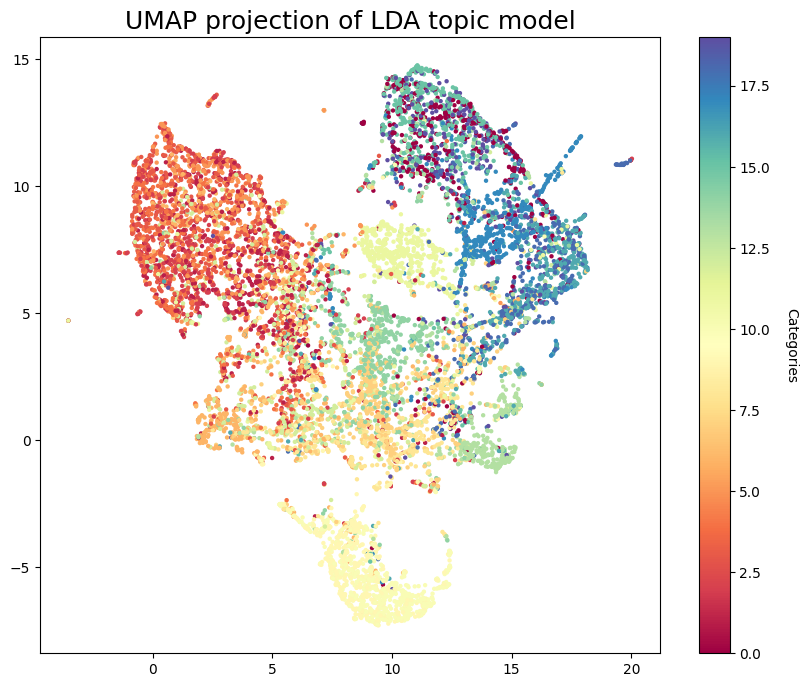

In [ ]:
import umap
import matplotlib.pyplot as plt
import numpy as np

def display_clusters_umap_colored(lda_model, corpus, num_topics, categories):
    """
    Display clusters of topics using UMAP with different colors for each category.

    Parameters:
    lda_model: Trained Gensim LDA model
    corpus: Corpus in Gensim BOW format
    num_topics: Number of topics in the LDA model
    categories: Series or list of category numbers for each document
    """
    # Extract the topic distribution for each document
    topic_distribution = [lda_model.get_document_topics(bow) for bow in corpus]

    # Prepare the data for UMAP (Document-topic matrix)
    doc_topic_matrix = np.zeros((len(corpus), num_topics))
    for i, doc_topics in enumerate(topic_distribution):
        for topic, prob in doc_topics:
            doc_topic_matrix[i, topic] = prob

    # Initialize and fit UMAP
    umap_model = umap.UMAP(n_neighbors=5, min_dist=0.2, n_components=2, metric='cosine')
    embedding = umap_model.fit_transform(doc_topic_matrix)

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='Spectral', s=10, edgecolor='none')
    plt.title('UMAP projection of LDA topic model', fontsize=18)

    # Creating a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Categories', rotation=270, labelpad=20)

    plt.show()

# Call the function to display colored clusters
categories = df['category']  # Make sure this is your category column from the dataframe
display_clusters_umap_colored(lda_model, corpus, num_topics, categories)


The LDA visualization shows a more distinct separation of clusters than LSA, which is expected given LDA's probabilistic approach to topic modeling. The clusters appear to be better defined and less overlapping, which could indicate that LDA is better at distinguishing between topics and assigning words to them. However, some clusters still seem to be close to each other, suggesting some shared thematic elements between topics.

In [17]:
import numpy as np

def calculate_average_topic_exclusivity(lda_model, topn=10):
    """
    Calculate the average exclusivity score across all topics in the LDA model.
    
    :param lda_model: The trained LDA model from Gensim or similar package.
    :param topn: Number of top words to consider for each topic.
    :return: The average exclusivity score across all topics.
    """
    topic_exclusivity_scores = []

    # Get the word probabilities for each topic
    word_probs = {i: dict(lda_model.get_topic_terms(i, topn=topn)) for i in range(lda_model.num_topics)}

    # Calculate exclusivity for each topic
    for topic_id in range(lda_model.num_topics):
        exclusive_score = 0
        for word, prob in word_probs[topic_id].items():
            # Calculate how much this word is 'exclusive' to the topic
            total_prob_other_topics = sum(word_probs[other_topic_id].get(word, 0)
                                          for other_topic_id in range(lda_model.num_topics)
                                          if other_topic_id != topic_id)
            # A higher score means the word is more exclusive to this topic
            exclusive_score += prob / (total_prob_other_topics + prob)
        
        # Normalize by the number of top words
        topic_exclusivity_scores.append(exclusive_score / topn)
    
    # Calculate the average exclusivity score across all topics
    average_exclusivity_score = np.mean(topic_exclusivity_scores)
    
    return average_exclusivity_score

# Assuming you have an LDA model named lda_model
average_exclusivity = calculate_average_topic_exclusivity(lda_model)
print(f"Average exclusivity score across all topics: {average_exclusivity}")


Average exclusivity score across all topics: 0.8699999999999999


In [22]:
import numpy as np
from scipy.stats import entropy
from gensim.models import LdaModel

def calculate_average_topic_diversity(lda_model, topn=20, epsilon=1e-12):
    num_topics = lda_model.num_topics
    topic_terms = []

    # Retrieve the probability distribution of words for each topic
    for topic_id in range(num_topics):
        topic_word_probs = lda_model.get_topic_terms(topic_id, topn=topn)
        probs = np.array([prob for _, prob in topic_word_probs])
        topic_terms.append(probs)

    topic_terms = np.array(topic_terms) + epsilon  # Add a small value to avoid log(0)
    topic_terms /= np.sum(topic_terms, axis=1, keepdims=True)  # Normalize distributions

    total_divergence = 0
    comparisons = 0

    # Calculate KL Divergence between each pair of topics
    for i in range(num_topics):
        for j in range(num_topics):
            if i != j:
                divergence = entropy(topic_terms[i], topic_terms[j])
                if np.isfinite(divergence):  # Ensure the divergence is valid
                    total_divergence += divergence
                    comparisons += 1

    # Calculate the average divergence
    if comparisons > 0:
        average_divergence = total_divergence / comparisons
    else:
        raise ValueError("No valid comparisons could be made. Check your LDA model and parameters.")

    return average_divergence

# Assuming you have an LDA model named lda_model
average_diversity = calculate_average_topic_diversity(lda_model)
print(f"Average Topic Diversity (KL Divergence) across all topics: {average_diversity}")


Average Topic Diversity (KL Divergence) across all topics: 0.1294051371857916


1. **Average Exclusivity Score (0.87)**: This score indicates a relatively high level of exclusivity across all topics. In other words, the words within each topic are distinct and do not overlap significantly with words from other topics. This suggests that the LDA model has succeeded in creating topics that are internally coherent and separated from each other.

2. **Average Topic Diversity (KL Divergence) (0.129)**: Topic diversity, as measured by KL Divergence, suggests that the topics exhibit a low level of dissimilarity from each other. While individual topics are exclusive, they also share some common terms or themes. This balance between exclusivity and diversity can be beneficial for certain applications where a moderate level of relatedness between topics is desired.

3. **Coherence Score (0.55)**: The coherence score evaluates how semantically related the top words within each topic are. A score of 0.55 indicates a moderate level of coherence. This means that while the top words in each topic have some meaningful connections, there is room for improvement to make the topics more coherent and interpretable.

In summary, the scores collectively suggest that the LDA-based topic modeling approach has performed well in terms of creating exclusive and internally coherent topics. However, there is a trade-off between exclusivity and diversity, with topics showing some commonalities. The coherence score, while moderate, indicates room for enhancing the interpretability of topics. Depending on the specific application, further refinement of the LDA model's parameters or post-processing steps may be considered to achieve the desired balance between exclusivity, diversity, and coherence in the generated topics.